# Causes for Delays and cancellation of Flights in the US
## by Mahmoud Elsayed

## Investigation Overview

> The main goal of this presentation is to investigate the main reasons for delays and cancellations of flights, First thing comes to mind that the weather is the main effect that causes delays of flights, however. this presentation will show that this isn't true and will show other surprising insights and findings.

## Dataset Overview

> The dataset contains 294237 flight observations focused on delays factors like carrier, weather, nas, security,... from june 2003 to january 2021

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [7]:
flights = pd.read_csv('flights.csv')
flights.drop(['Unnamed: 21'],axis = 1,inplace = True)
flights.dropna(inplace = True)
flights.rename(columns = {'arr_del15':'arr_del15_count',
                         'carrier_ct': 'carrier_count',
                         'weather_ct': 'weather_count',
                         'nas_ct': 'nas_count',
                         'security_ct': 'security_count',
                         'late_aircraft_ct': 'late_aircraft_count',
                         'arr_cancelled': 'arr_cancelled_count',
                         'arr_diverted': 'ar_diverted_count',
                         ' weather_ct': 'weather_count'},inplace = True)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Worst state with respect to weather)

> First lets look at the states and see which state has the highest delayed flight because of its weather
> Texas has the highest weather caused delayed flights

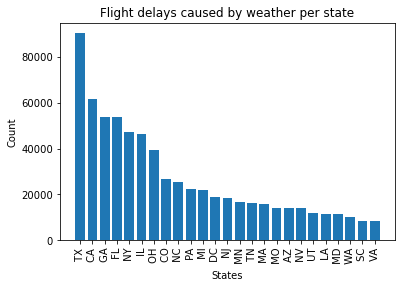

In [14]:
flights['state'] = flights['airport_name'].str.split(',').str[-1].str.split(':').str[0]
flights_weather_cancel = flights[['state','weather_count']].groupby('state').sum().reset_index().sort_values('weather_count',ascending = False)
flights_weather_cancel = flights_weather_cancel.iloc[:25]
plt.bar(flights_weather_cancel.state,flights_weather_cancel.weather_count)
plt.xticks(rotation = 90);
plt.xlabel('States');
plt.ylabel('Count');
plt.title('Flight delays caused by weather per state');

## (Delayed flights Causes per year)

> This Graphs clearly shows the different delays causes and the count of delayed flights per year and to my surprise Weather isn't the main cause for delays not even the second most.However, late_aircrafts are the main reasons for flight delays, while the weakest cause for delays is security reasons.

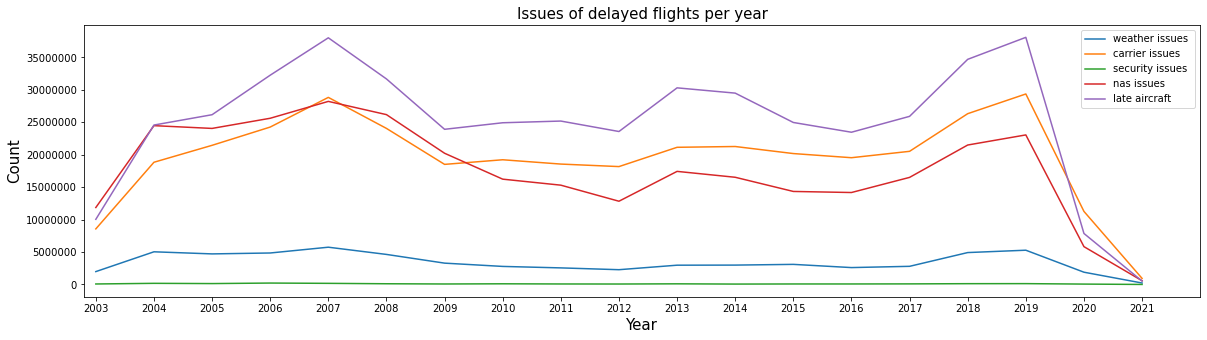

In [8]:
plt.subplots(figsize = (20,5))

flights_feature  = flights.groupby('year')['weather_delay'].sum().reset_index()
sb.lineplot(data = flights_feature,x = 'year', y = 'weather_delay',label = 'weather issues ')

flights_feature  = flights.groupby('year')[' carrier_delay'].sum().reset_index()
sb.lineplot(data = flights_feature,x = 'year', y = ' carrier_delay',label = 'carrier issues ')

flights_feature  = flights.groupby('year')['security_delay'].sum().reset_index()
sb.lineplot(data = flights_feature,x = 'year', y = 'security_delay',label = 'security issues ')

flights_feature  = flights.groupby('year')['nas_delay'].sum().reset_index()
sb.lineplot(data = flights_feature,x = 'year', y = 'nas_delay',label = 'nas issues ')

flights_feature  = flights.groupby('year')['late_aircraft_delay'].sum().reset_index()
sb.lineplot(data = flights_feature,x = 'year', y = 'late_aircraft_delay',label = 'late aircraft')
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Count',fontsize = 15)
plt.xticks(range(2003,2022,1));
plt.xlim(2002.8,2022)
plt.xlabel('Year',fontsize = 15)
plt.title('Issues of delayed flights per year',fontsize = 15);
plt.legend();

## (Weather cancellation per month )
> Another unintuitive insight that the most delayed flights aren't in the cold rainy weather but infact in the hot months of the year as shown in the graph the peak of the curve is at june and july months.

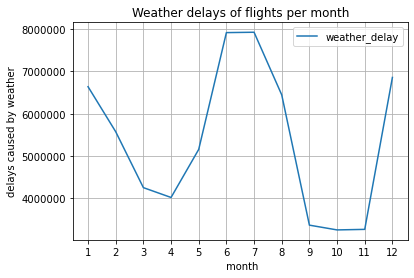

In [11]:
flights_weather_month = flights[['weather_delay',' month']].groupby(' month').sum().reset_index()
flights_weather_month.plot(x =' month', y = 'weather_delay' )
plt.ylabel('delays caused by weather')
plt.xticks(range(1,13,1));
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.title('Weather delays of flights per month');
plt.grid()

In [17]:
!jupyter nbconvert slide_deck.ipynb --to slides --no-input

[NbConvertApp] Converting notebook slide_deck.ipynb to slides
[NbConvertApp] Writing 701431 bytes to slide_deck.slides.html
